# Bước 3: Mô hình Phân khúc khách hàng

Notebook này thực hiện phân khúc khách hàng sử dụng các kỹ thuật clustering.

## Mục tiêu

1. Tải features đã xử lý từ kỹ thuật tạo features
2. Áp dụng Phân tích thành phần chính (PCA) để trực quan hóa dữ liệu
3. Xác định số cluster tối ưu
4. Áp dụng K-Means clustering
5. Phân tích và diễn giải các phân khúc khách hàng
6. Lưu kết quả phân cụm

## Phân khúc khách hàng là gì?

Phân khúc khách hàng là quá trình chia khách hàng thành các nhóm dựa trên các đặc điểm chung. Điều này giúp doanh nghiệp:
- Hiểu được các hành vi khách hàng khác nhau
- Nhắm mục tiêu các nỗ lực marketing hiệu quả hơn
- Cải thiện dịch vụ khách hàng
- Tăng khả năng giữ chân khách hàng

## Import thư viện

In [1]:
%load_ext autoreload
%autoreload 2

# Import thư viện
import sys
sys.path.append('../src')

from clustering_library import ClusterAnalyzer
import matplotlib.pyplot as plt

/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Tải dữ liệu đã xử lý

In [2]:
# Tải features đã chuẩn hóa (chuẩn bị cho clustering)
scaled_path = '../data/processed/customer_features_scaled.csv'
original_path = '../data/processed/customer_features.csv'

# Khởi tạo cluster analyzer và tải dữ liệu
analyzer = ClusterAnalyzer(scaled_path, original_path)
df_scaled, df_original = analyzer.load_data()

df_scaled.head()

Số khách hàng: 3921
Số features: 16


,Sum_Quantity,Mean_UnitPrice,Mean_TotalPrice,Sum_TotalPrice,Count_Invoice,Count_Stock,Mean_InvoiceCountPerStock,Mean_StockCountPerInvoice,Mean_UnitPriceMeanPerInvoice,Mean_QuantitySumPerInvoice,Mean_TotalPriceMeanPerInvoice,Mean_TotalPriceSumPerInvoice,Mean_UnitPriceMeanPerStock,Mean_QuantitySumPerStock,Mean_TotalPriceMeanPerStock,Mean_TotalPriceSumPerStock
CustomerID,,,,,,,,,,,,,,,,
000nan,4.984467,1.506343,-0.268408,4.595722,2.432481,4.773105,2.067962,2.330682,3.094080,0.761335,0.914696,2.100059,2.332104,1.979686,-0.076864,2.392380
012346,3.789233,-2.120154,3.800623,3.161700,-1.158633,-2.296006,-1.015864,-2.307499,-2.100457,8.847780,3.719362,7.377665,-2.141668,3.384916,3.763263,3.337067
012747,0.879252,0.879583,1.007144,1.397472,1.532615,0.156943,1.957285,-0.614124,0.749921,-0.306106,0.973710,0.485241,1.078802,1.041469,0.667948,1.526344
012748,3.038005,-0.106556,-1.068898,2.706127,2.352800,3.983682,1.982065,0.343236,1.872665,-0.238979,-0.080428,-0.710410,-0.049208,0.348309,-0.892187,-0.000881
012749,0.982814,1.125208,0.282588,1.379978,0.890138,1.397000,0.537992,1.095989,1.056342,0.756329,0.259518,1.527988,1.056653,-0.159892,0.290885,0.329836


In [3]:
# Kiểm tra thống kê cơ bản
print("Thống kê mô tả dữ liệu đã chuẩn hóa:")
df_scaled.describe().round(2)

Thống kê mô tả dữ liệu đã chuẩn hóa:


,Sum_Quantity,Mean_UnitPrice,Mean_TotalPrice,Sum_TotalPrice,Count_Invoice,Count_Stock,Mean_InvoiceCountPerStock,Mean_StockCountPerInvoice,Mean_UnitPriceMeanPerInvoice,Mean_QuantitySumPerInvoice,Mean_TotalPriceMeanPerInvoice,Mean_TotalPriceSumPerInvoice,Mean_UnitPriceMeanPerStock,Mean_QuantitySumPerStock,Mean_TotalPriceMeanPerStock,Mean_TotalPriceSumPerStock
count,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00
mean,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.90,-5.07,-2.99,-5.04,-1.16,-2.30,-1.02,-2.31,-5.07,-4.20,-3.04,-6.00,-5.14,-2.99,-3.00,-3.17
25%,-0.66,-0.55,-0.48,-0.65,-1.16,-0.70,-1.02,-0.65,-0.56,-0.58,-0.42,-0.60,-0.55,-0.57,-0.50,-0.45
50%,-0.03,0.04,0.08,0.00,-0.20,-0.00,-0.23,0.02,0.05,0.03,0.02,0.07,0.06,0.07,0.10,0.02
75%,0.67,0.59,0.48,0.69,0.89,0.70,0.81,0.64,0.57,0.62,0.48,0.58,0.58,0.56,0.47,0.51
max,4.98,4.55,3.80,4.60,2.43,4.77,2.07,4.20,3.95,8.85,3.73,7.48,4.52,3.38,3.76,3.34


## Phân tích thành phần chính (PCA)

PCA giúp chúng ta:
- Giảm số chiều trong dữ liệu
- Trực quan hóa dữ liệu nhiều chiều trong 2D hoặc 3D
- Hiểu features nào quan trọng nhất
- Loại bỏ nhiễu và thông tin dư thừa

In [4]:
# Áp dụng PCA
df_pca = analyzer.apply_pca()
df_pca.head()

PCA shape: (3921, 16)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
CustomerID,,,,,,,,,,,,,,,,
000nan,5.104705,6.063078,6.391219,0.226072,-1.197016,0.932380,0.608974,2.324502,-0.421618,-1.520668,-1.335087,-0.344153,0.849803,0.305922,-0.152621,-0.421493
012346,11.876819,2.811105,-5.279586,7.056986,0.348378,0.627562,0.026393,-4.394967,-0.403090,0.147813,-0.908287,0.545115,0.249571,-0.642368,-0.531846,0.184966
012747,3.293322,0.261896,2.094127,-1.435189,0.633041,0.106012,-0.189400,0.024610,0.066971,-0.302740,0.089189,0.029122,0.148284,-0.107151,0.113264,-0.016799
012748,1.106624,4.646175,3.207660,-2.557721,-1.609905,0.409120,1.302159,0.980759,-0.661655,-0.488400,-1.454928,-0.431079,-0.214607,0.126055,-0.127404,0.191716
012749,1.486280,1.811761,2.660052,1.085017,-0.092466,-0.212635,-0.054372,0.136352,0.058247,0.205333,0.046851,0.032185,-0.063369,-0.024972,0.000927,-0.053809


### Tỷ lệ phương sai được giải thích

Biểu thị lượng thông tin (phương sai) mà mỗi thành phần chính nắm bắt được.

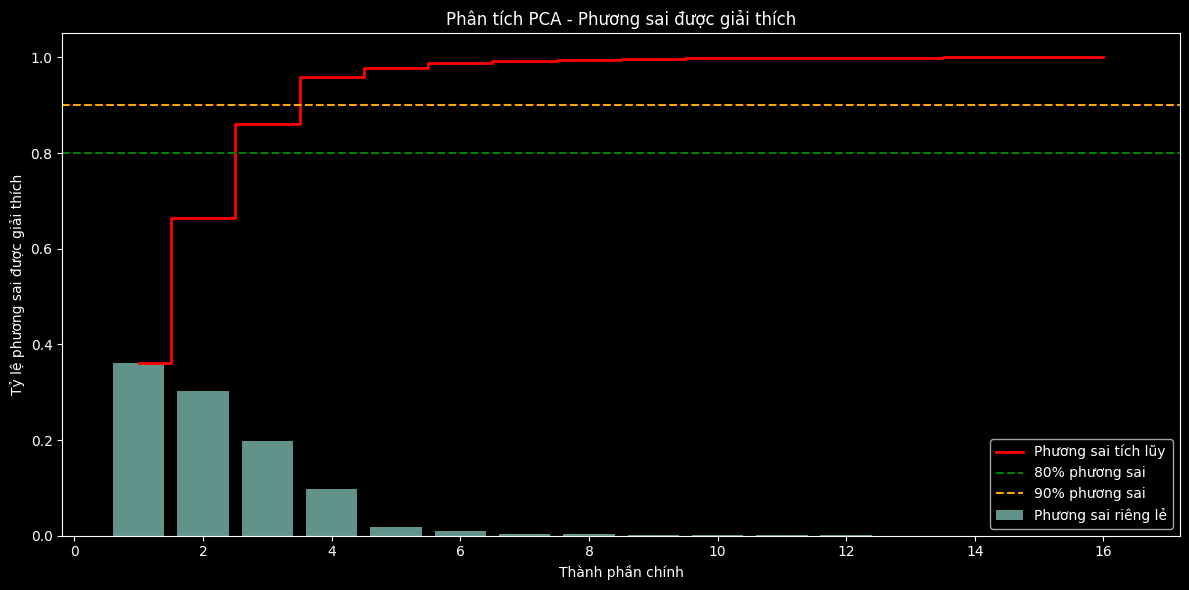


Phương sai tích lũy:
PC1-PC1: 36.08%
PC1-PC2: 66.41%
PC1-PC3: 86.12%
PC1-PC4: 95.95%
PC1-PC5: 97.76%


In [5]:
# Biểu đồ tỷ lệ phương sai được giải thích
analyzer.plot_pca_variance()

## Xác định số Cluster tối ưu

Tìm số cluster phù hợp (k) là điều quan trọng cho việc phân khúc có ý nghĩa. Chúng ta sẽ sử dụng hai phương pháp bổ sung:

1. **Phương pháp Elbow**: Tìm "khuỷu tay" trong đường cong inertia
2. **Silhouette Score**: Tìm k có điểm silhouette trung bình cao nhất

Sử dụng cả hai phương pháp cùng nhau giúp chúng ta tin tưởng hơn vào việc chọn k.

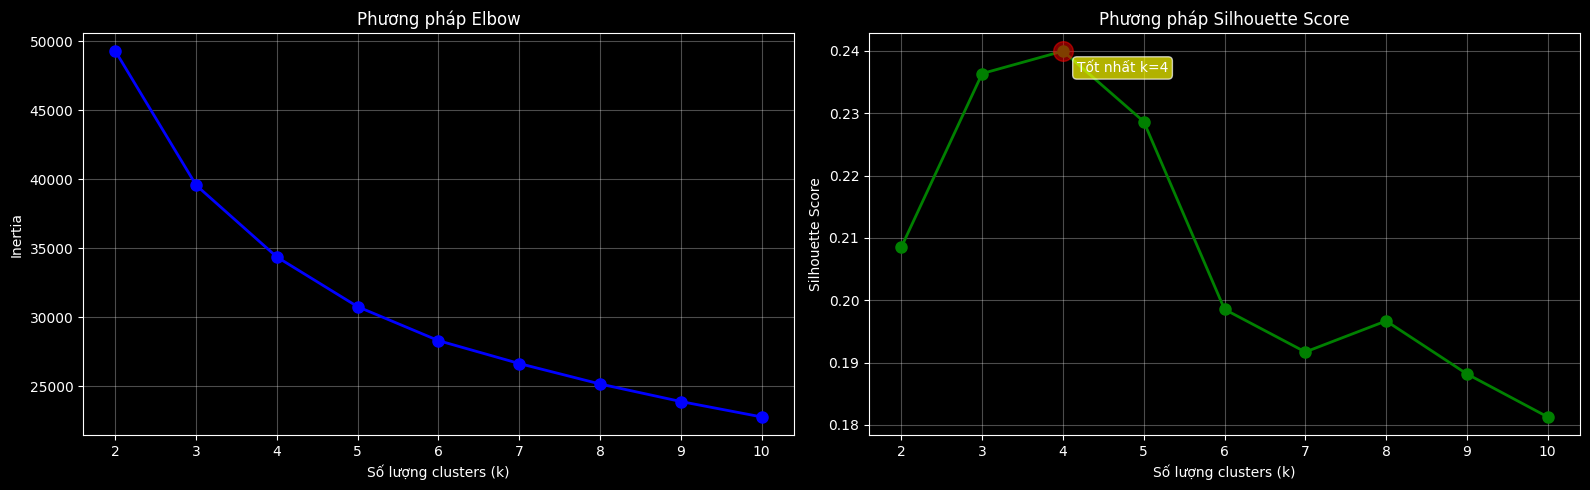

Silhouette Score đề xuất: k=4 (điểm số = 0.240)


In [6]:
# Tìm số cluster tối ưu
optimal_results = analyzer.find_optimal_clusters()

# Vẽ biểu đồ so sánh các phương pháp
analyzer.plot_optimal_clusters()

## K-Means Clustering

Chúng ta sẽ áp dụng K-Means clustering với các giá trị k khác nhau (3 và 4) và so sánh kết quả.

Kích thước clusters (k=3):
0    1540
1    1512
2     869
Name: count, dtype: int64
Kích thước clusters (k=4):
0    1114
1     646
2    1319
3     842
Name: count, dtype: int64


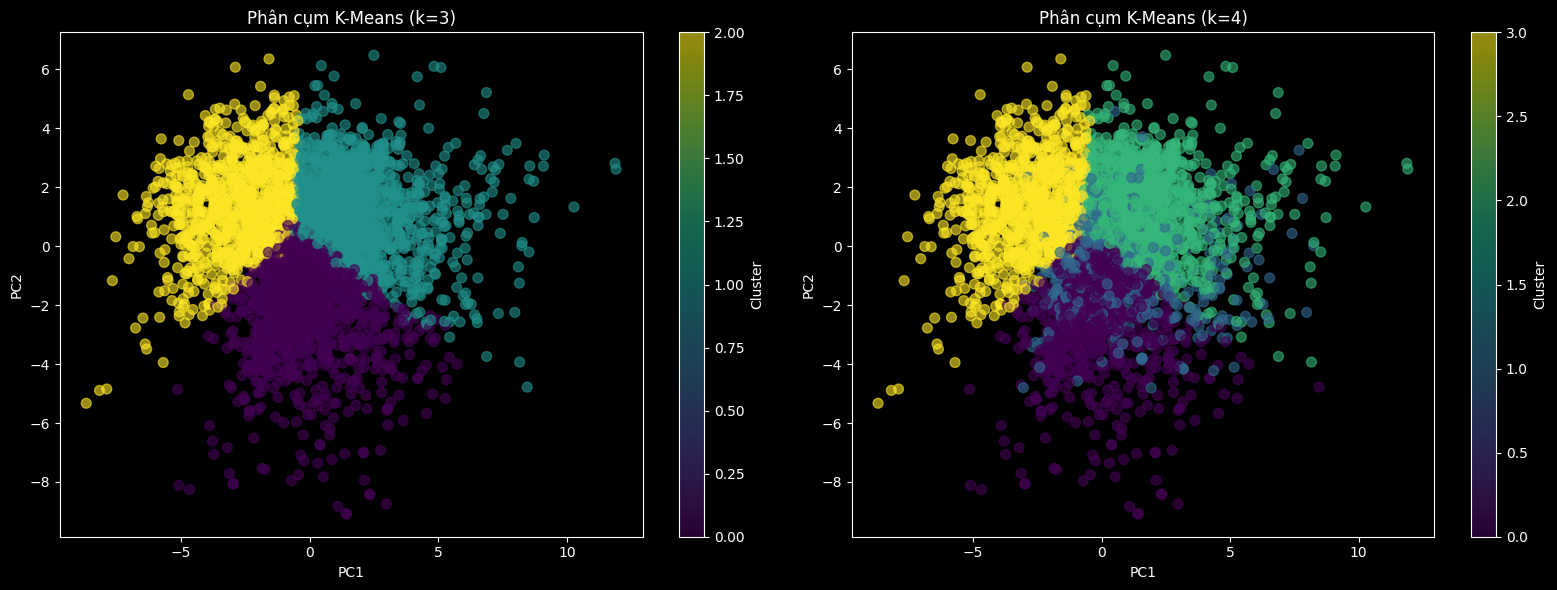

In [7]:
# Áp dụng K-Means với k=3 và k=4
cluster_results = analyzer.apply_kmeans([3, 4])

# Trực quan hóa clusters trong không gian PCA
analyzer.plot_clusters_pca([3, 4])

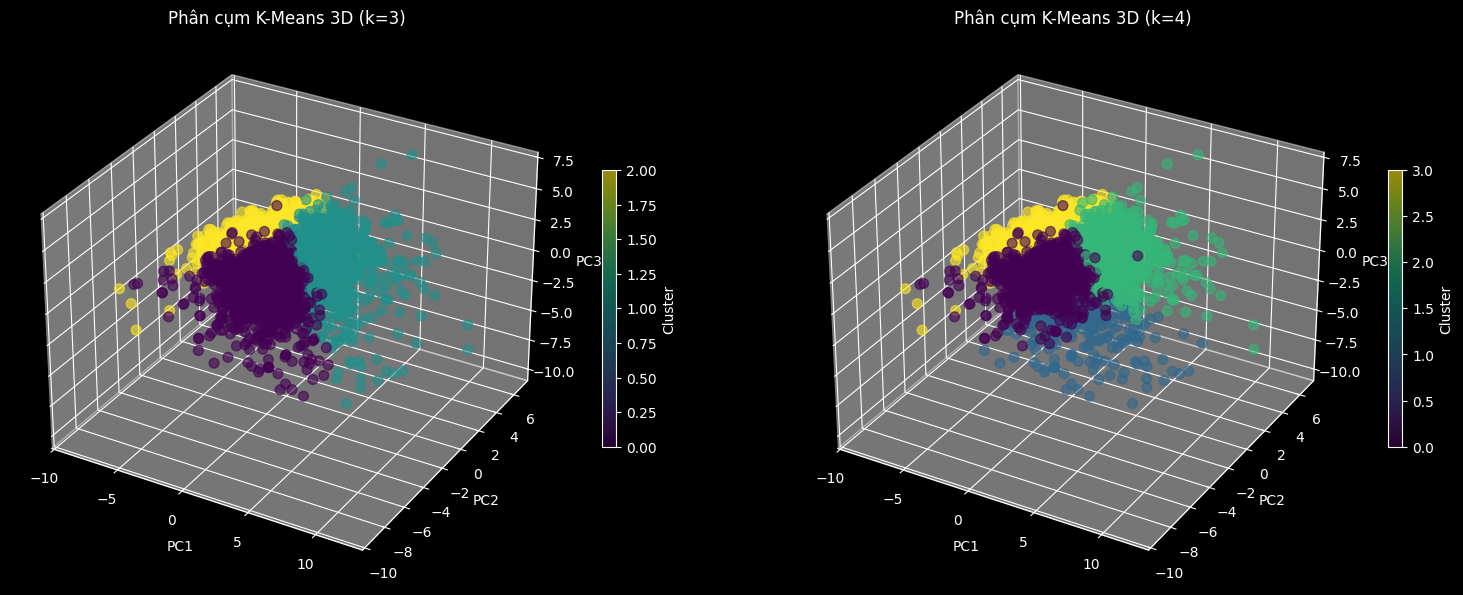

In [8]:
# Trực quan hóa clusters trong không gian PCA 3D
analyzer.plot_clusters_pca_3d([3, 4])

## Phân tích và diễn giải Cluster

Hãy phân tích đặc điểm của từng cluster để hiểu các phân khúc khách hàng khác nhau.

In [9]:
# Thống kê trung bình cho từng cluster
print("=== PHÂN TÍCH CLUSTER K=3 ===")
cluster_means_3 = cluster_results[3]['means']
cluster_sizes_3 = cluster_results[3]['sizes']

print("Kích thước clusters:")
for cluster, size in cluster_sizes_3.items():
    print(f"- Cluster {cluster}: {size:,} khách hàng ({size/cluster_sizes_3.sum()*100:.1f}%)")

display(cluster_means_3.round(2).style.background_gradient(cmap='viridis', axis=0))

=== PHÂN TÍCH CLUSTER K=3 ===
Kích thước clusters:
- Cluster 0: 1,540 khách hàng (39.3%)
- Cluster 1: 1,512 khách hàng (38.6%)
- Cluster 2: 869 khách hàng (22.2%)


,Sum_Quantity,Mean_UnitPrice,Mean_TotalPrice,Sum_TotalPrice,Count_Invoice,Count_Stock,Mean_InvoiceCountPerStock,Mean_StockCountPerInvoice,Mean_UnitPriceMeanPerInvoice,Mean_QuantitySumPerInvoice,Mean_TotalPriceMeanPerInvoice,Mean_TotalPriceSumPerInvoice,Mean_UnitPriceMeanPerStock,Mean_QuantitySumPerStock,Mean_TotalPriceMeanPerStock,Mean_TotalPriceSumPerStock
Cluster_3,,,,,,,,,,,,,,,,
0,181.160000,6.350000,33.980000,365.260000,1.680000,16.170000,1.080000,11.300000,6.860000,124.190000,35.750000,240.680000,6.340000,16.910000,33.440000,39.270000
1,2627.300000,3.590000,147.830000,5154.670000,8.310000,88.530000,1.520000,21.310000,4.280000,412.290000,173.230000,633.410000,3.810000,133.770000,145.770000,200.940000
2,472.870000,2.620000,6.290000,769.690000,3.300000,95.160000,1.220000,41.990000,2.770000,159.610000,7.110000,246.560000,2.630000,4.820000,6.250000,7.600000


In [10]:
# Thống kê trung bình cho từng cluster k=4
print("=== PHÂN TÍCH CLUSTER K=4 ===")
cluster_means_4 = cluster_results[4]['means']
cluster_sizes_4 = cluster_results[4]['sizes']

print("Kích thước clusters:")
for cluster, size in cluster_sizes_4.items():
    print(f"- Cluster {cluster}: {size:,} khách hàng ({size/cluster_sizes_4.sum()*100:.1f}%)")

display(cluster_means_4.round(2).style.background_gradient(cmap='viridis', axis=0))

=== PHÂN TÍCH CLUSTER K=4 ===
Kích thước clusters:
- Cluster 0: 1,114 khách hàng (28.4%)
- Cluster 1: 646 khách hàng (16.5%)
- Cluster 2: 1,319 khách hàng (33.6%)
- Cluster 3: 842 khách hàng (21.5%)


,Sum_Quantity,Mean_UnitPrice,Mean_TotalPrice,Sum_TotalPrice,Count_Invoice,Count_Stock,Mean_InvoiceCountPerStock,Mean_StockCountPerInvoice,Mean_UnitPriceMeanPerInvoice,Mean_QuantitySumPerInvoice,Mean_TotalPriceMeanPerInvoice,Mean_TotalPriceSumPerInvoice,Mean_UnitPriceMeanPerStock,Mean_QuantitySumPerStock,Mean_TotalPriceMeanPerStock,Mean_TotalPriceSumPerStock,Cluster_3
Cluster_4,,,,,,,,,,,,,,,,,
0,165.100000,8.500000,46.000000,434.860000,1.770000,17.190000,1.090000,11.420000,9.190000,103.480000,48.160000,260.670000,8.490000,12.230000,45.310000,76.110000,0.000000
1,504.820000,1.670000,56.510000,481.830000,1.720000,18.050000,1.110000,12.720000,1.680000,303.770000,59.040000,312.390000,1.670000,85.710000,56.080000,68.500000,0.370000
2,2851.500000,3.570000,142.810000,5753.740000,9.230000,98.620000,1.560000,22.330000,4.380000,388.020000,170.950000,639.850000,3.810000,121.070000,140.600000,178.600000,1.000000
3,464.650000,2.650000,6.170000,760.490000,3.280000,95.670000,1.220000,42.400000,2.760000,154.420000,6.970000,245.220000,2.660000,4.540000,6.140000,7.470000,2.000000


### Biểu đồ Radar cho hồ sơ Cluster

Biểu đồ Radar giúp chúng ta visualize đặc điểm của từng cluster một cách trực quan.

#### Cách đọc Radar Chart:

1. **Mỗi trục = 1 đặc điểm khách hàng** (đã được chuẩn hóa về scale 0-1)
2. **Càng xa tâm = giá trị càng cao** cho đặc điểm đó
3. **Hình dạng của đa giác** cho thấy "hồ sơ" của cluster
4. **So sánh các cluster** bằng cách nhìn vào hình dạng và kích thước

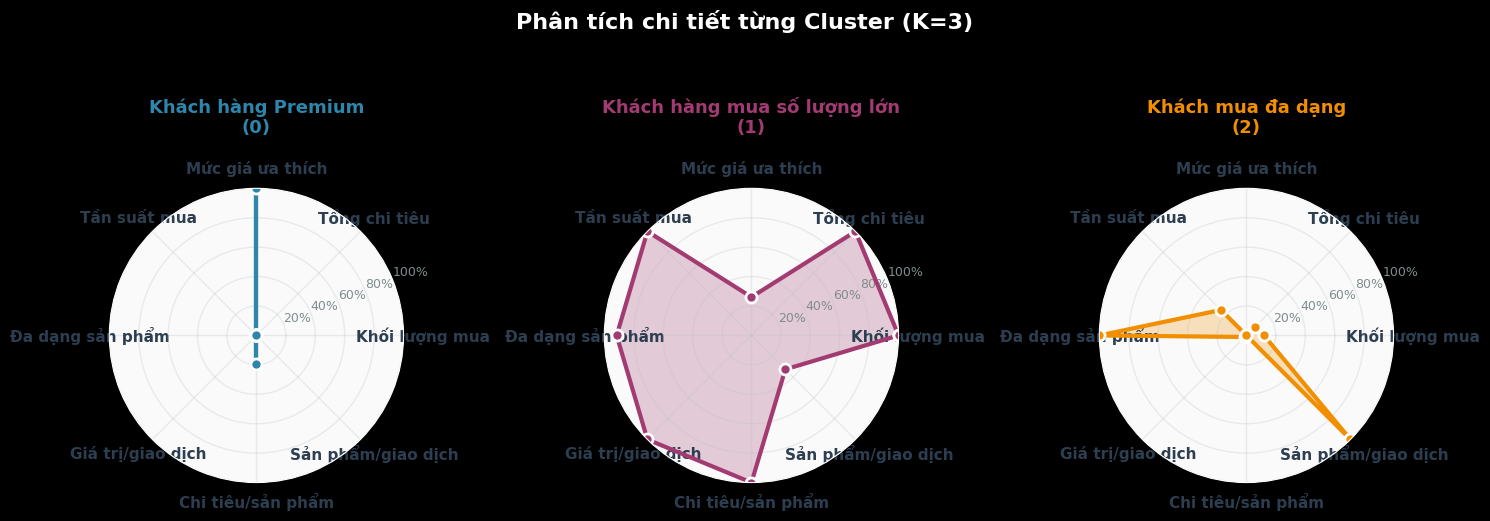

In [11]:
# Tạo individual radar plots cho k=3
analyzer.create_individual_radar_plots(3, ['Khách hàng Premium', 'Khách hàng mua số lượng lớn', 'Khách mua đa dạng'])

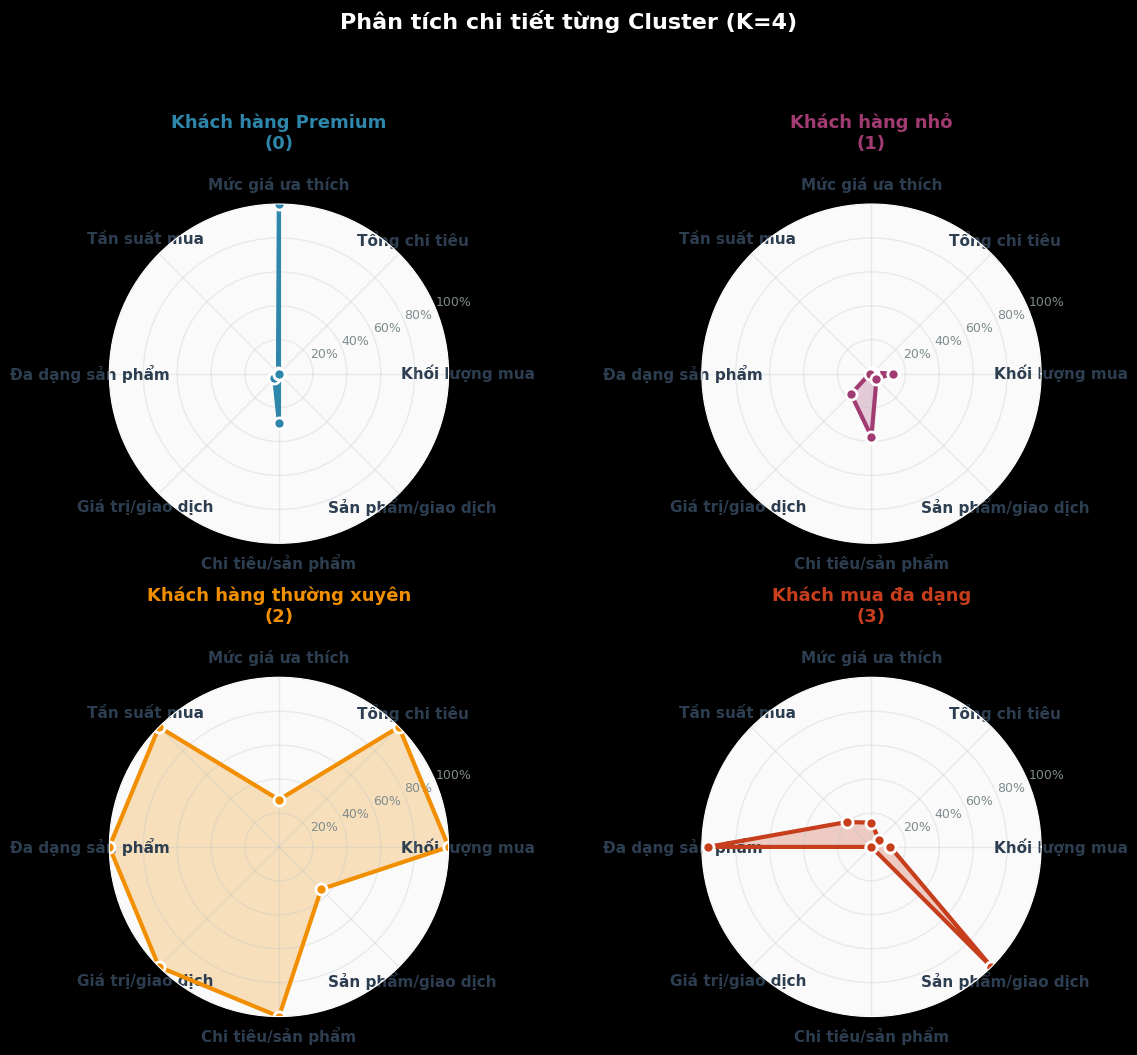

In [12]:
# Tạo individual radar plots cho k=4
analyzer.create_individual_radar_plots(4, ['Khách hàng Premium', 'Khách hàng nhỏ', 'Khách hàng thường xuyên', 'Khách mua đa dạng'])

### Phân tích Radar Chart

**So sánh k=3 vs k=4:**

**Với K=3 clusters (phân tích chi tiết theo số liệu):**
- **Cluster 0 (39.3% - 1,540 khách)**: **Khách hàng Premium**
  - Giá trung bình cao nhất: 6.35 vs 3.59 và 2.62
  - Số lượng mua vừa phải: 181 sản phẩm
  - Ít giao dịch nhưng giá trị cao: 1.68 hóa đơn, giá trị 365
  
- **Cluster 1 (38.6% - 1,512 khách)**: **Khách hàng Mua Số Lượng Lớn** 
  - **Đặc điểm nổi bật**: Số lượng mua cao nhất 2,627 (gấp 14.5 lần cluster 0)
  - Giá thấp nhất trong 3 cluster: 3.59 (chiết khấu số lượng)
  - Nhiều giao dịch nhất: 8.31 hóa đơn (gấp 5 lần cluster 0)
  - Tổng giá trị cao nhất: 5,155 (gấp 14 lần cluster 0)
  
- **Cluster 2 (22.2% - 869 khách)**: **Khách hàng Khám Phá Đa Dạng**
  - Mua nhiều sản phẩm khác nhau nhất: 95.16 loại sản phẩm
  - Giá rất thấp: 2.62 (sản phẩm bình dân)
  - Ít giao dịch: 3.3 hóa đơn

**Với K=4 clusters (sự phân tách từ K=3):**
- **Cluster 0 (28.4%)**: Khách hàng Premium - **Giữ nguyên** từ K=3
- **Cluster 1 (16.5%)**: **Khách hàng Mua Ít** - Tách từ "Mua Số Lượng Lớn" K=3
- **Cluster 2 (33.6%)**: **Khách hàng Mua Nhiều Thường Xuyên** - Phần còn lại của "Mua Số Lượng Lớn" K=3  
- **Cluster 3 (21.5%)**: Khách hàng Đa dạng - **Giữ nguyên** từ K=3

#### Insights từ Radar Chart:

**1. Cluster "Mua Số Lượng Lớn" (Cluster 1 trong K=3) được phân tách thành 2:**
- **Lý do phân tách**: Trong K=3, cluster này quá lớn (38.6%) và có internal variance cao
- **Cluster 1 K=4 (16.5%)**: Nhóm khách hàng mua ít hơn, có thể là khách lẻ hoặc SME
- **Cluster 2 K=4 (33.6%)**: Nhóm khách hàng mua nhiều thường xuyên, có thể là B2B/wholesaler

**2. Pattern Recognition từ Radar Chart:**
- **Premium (Cluster 0)**: "Spike" cao ở UnitPrice, thấp ở Quantity → **High-margin customers**
- **Bulk Buyers (Cluster 1 K=3)**: "Spike" cao ở Quantity + Invoice count → **Volume-driven customers**  
- **Explorers (Cluster 2 K=3)**: Cân bằng ở Stock diversity → **Discovery-oriented customers**

**3. Giá trị kinh doanh của K=4 vs K=3:**

**K=3 Problems:**
- Cluster "Mua Số Lượng Lớn" quá broad (38.6%), khó targeting
- Mix giữa khách SME và khách B2B trong cùng 1 cluster

**K=4 Solutions:**
- **Segmentation tốt hơn**: 4 nhóm với behavior patterns rõ ràng
- **Balanced distribution**: 16-34% mỗi cluster thay vì 22-39%
- **Actionable insights**: Mỗi cluster có chiến lược riêng

**4. Strategic Recommendations dựa trên K=4:**
- **Cluster 0 (Premium 28.4%)**: VIP program, premium product focus
- **Cluster 1 (Mua Ít 16.5%)**: Upselling campaigns, product bundles  
- **Cluster 2 (Mua Nhiều 33.6%)**: Volume discounts, B2B services
- **Cluster 3 (Đa Dạng 21.5%)**: Recommendation engine, cross-selling

**5. Conclusion: K=4 Tốt hơn cho Business Application**
- **Granularity**: Phân khúc chi tiết hơn mà không over-segment
- **Actionability**: Mỗi cluster có action plan rõ ràng
- **Revenue potential**: Tối ưu hóa strategy cho từng customer journey

## Lưu kết quả phân cụm

In [13]:
# Lưu kết quả phân cụm cho cả k=3 và k=4
analyzer.save_clusters()

Đã lưu kết quả phân cụm k=3: ../data/processed/customer_clusters_k3.csv
Đã lưu kết quả phân cụm k=4: ../data/processed/customer_clusters_k4.csv


## Giải thích Cluster với SHAP Values

**SHAP (SHapley Additive exPlanations)** là một phương pháp tiên tiến để giải thích kết quả của mô hình machine learning.

### Tại sao cần SHAP cho Clustering?

Mặc dù **Radar Chart** giúp chúng ta hiểu **đặc điểm trung bình** của mỗi cluster, nhưng nó không trả lời được câu hỏi quan trọng:

> **"Tại sao khách hàng A thuộc Cluster 2 thay vì Cluster 1?"**

SHAP giải quyết vấn đề này bằng cách:

1. **Quantify Feature Importance**: Đo lường chính xác mức độ ảnh hưởng của từng feature
2. **Individual Explanations**: Giải thích tại sao một khách hàng cụ thể thuộc cluster đó
3. **Compare with Alternatives**: So sánh khách hàng với các cluster khác

### Phương pháp: Mô hình thế

Vì K-Means là **unsupervised learning**, chúng ta sử dụng cần sử dụng một mô hình khác để có thể học trên các cluster mà K-Means chọn lựa ra để có thể đưa ra lời giải thích:

1. **Train RandomForestClassifier** để dự đoán cluster assignments từ K-Means
2. **Apply SHAP TreeExplainer** để giải thích predictions của Random Forest
3. **Interpret**: SHAP values cho biết feature nào khiến model (và gián tiếp K-Means) gán khách hàng vào cluster cụ thể

### So sánh SHAP vs Radar Chart

| Aspect | Radar Chart | SHAP Values |
|--------|-------------|-------------|
| **Mục đích** | Visualize cluster profiles | Explain individual predictions |
| **Level** | Cluster-level (trung bình) | Customer-level + Cluster-level |
| **Câu hỏi trả lời** | "Cluster này có đặc điểm gì?" | "Tại sao khách hàng X ở cluster Y?" |
| **Feature selection** | 6-8 features chọn thủ công | Tất cả 16 features, xếp hạng theo độ quan trọng |

**Kết luận**: Radar Chart và SHAP bổ sung cho nhau, không phải thay thế!

### Bước 1: Train Surrogate Models

Chúng ta sẽ train RandomForestClassifier cho cả k=3 và k=4 để dự đoán cluster assignments.

In [14]:
# Train surrogate model cho k=3
surrogate_results_3 = analyzer.train_surrogate_model(3)

=== SURROGATE MODEL TRAINING (k=3) ===
Accuracy: 1.0000 (100.00%)

Confusion Matrix:
[[1540    0    0]
 [   0 1512    0]
 [   0    0  869]]

Model can ACCURATELY predict cluster assignments.


In [15]:
# Train surrogate model cho k=4
surrogate_results_4 = analyzer.train_surrogate_model(4)

=== SURROGATE MODEL TRAINING (k=4) ===
Accuracy: 1.0000 (100.00%)

Confusion Matrix:
[[1114    0    0    0]
 [   0  646    0    0]
 [   0    0 1319    0]
 [   0    0    0  842]]

Model can ACCURATELY predict cluster assignments.


### Bước 2: Tính toán SHAP Values

Sử dụng toàn bộ 3,921 khách hàng làm background dataset để tính SHAP values.

In [90]:
# Tính SHAP values cho k=3
shap_results_3 = analyzer.calculate_shap_values(3)

Tính toán SHAP values cho 3,921 khách hàng...
Hoàn thành! SHAP values: 3 clusters, mỗi cluster shape: (3921, 16)
Hoàn thành! SHAP values: 3 clusters, mỗi cluster shape: (3921, 16)


In [91]:
# Tính SHAP values cho k=4
shap_results_4 = analyzer.calculate_shap_values(4)

Tính toán SHAP values cho 3,921 khách hàng...
Hoàn thành! SHAP values: 4 clusters, mỗi cluster shape: (3921, 16)
Hoàn thành! SHAP values: 4 clusters, mỗi cluster shape: (3921, 16)


### Bước 3: SHAP Feature Importance (Global View)

Biểu đồ Bar Chart cho thấy features nào quan trọng nhất trong việc phân biệt các clusters.

**Cách đọc:**
- **Trục Y**: Các features
- **Trục X**: Mức độ ảnh hưởng trung bình (mean absolute SHAP value)
- **Càng dài** = Feature càng quan trọng cho việc phân cluster

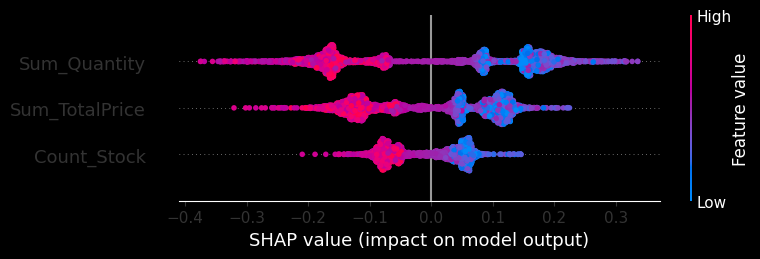

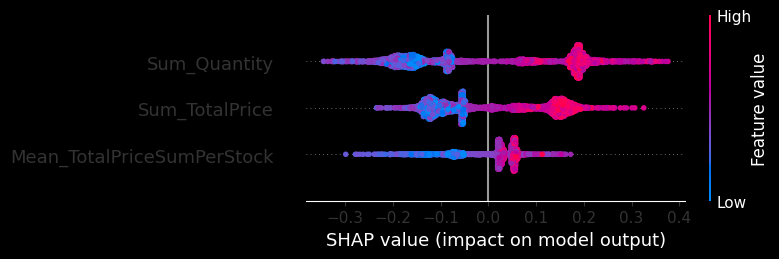

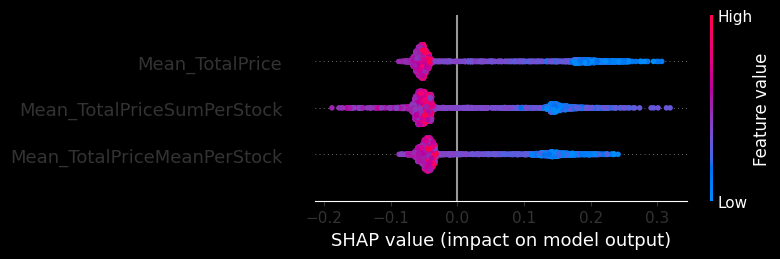

In [95]:
analyzer.plot_shap_summary(3)

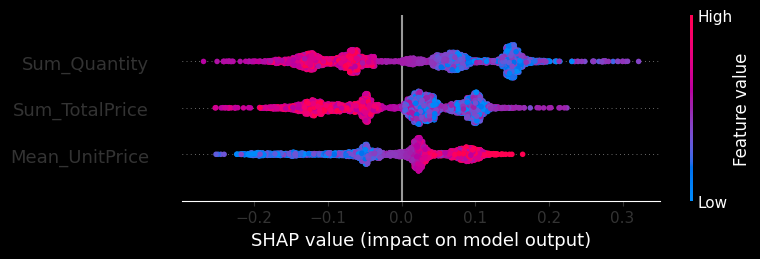

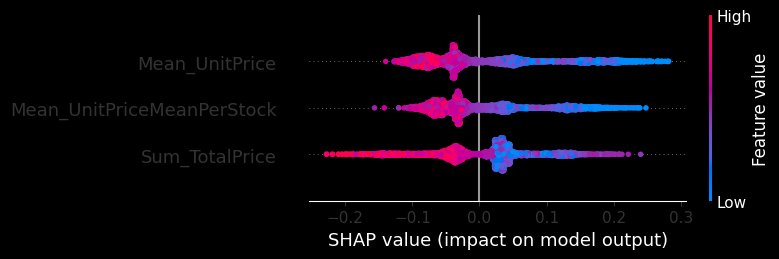

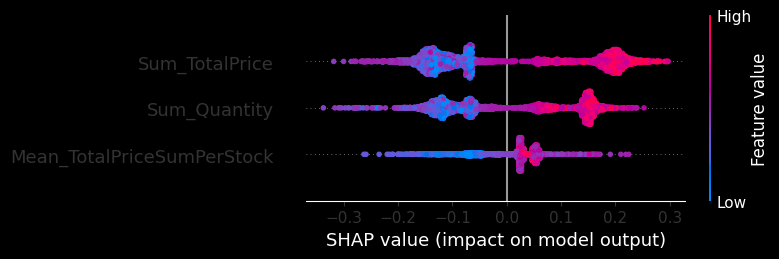

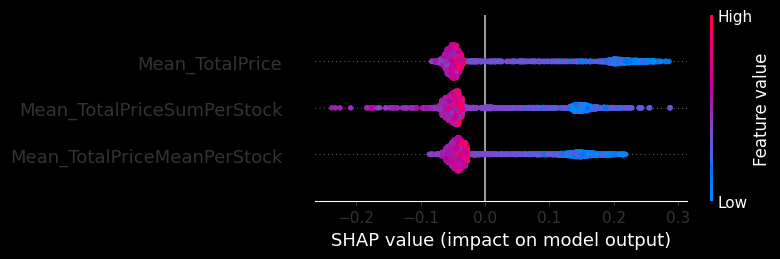

In [96]:
analyzer.plot_shap_summary(4)

### Bước 4: SHAP Summary Plot (Beeswarm)

Beeswarm plot cho thấy **phân phối SHAP values** cho mỗi feature.

**Cách đọc:**
- **Mỗi điểm** = 1 khách hàng
- **Vị trí X** = SHAP value (ảnh hưởng đến prediction)
  - **Dương (+)**: Tăng xác suất thuộc cluster này
  - **Âm (-)**: Giảm xác suất thuộc cluster này
- **Màu sắc** = Giá trị feature
  - **Đỏ**: Giá trị cao
  - **Xanh**: Giá trị thấp

In [47]:
# SHAP Summary (Beeswarm) cho k=4
import shap

shap_values_4 = shap_results_4['shap_values']
X_4 = shap_results_4['X']
feature_names_4 = shap_results_4['feature_names']

# Plot for all clusters
if isinstance(shap_values_4, list):
    n_clusters = len(shap_values_4)
    fig, axes = plt.subplots(
        (n_clusters + 1) // 2, 2, 
        figsize=(16, 6 * ((n_clusters + 1) // 2))
    )
    axes = axes.flatten() if n_clusters > 1 else [axes]
    
    for i in range(n_clusters):
        plt.sca(axes[i])
        shap.summary_plot(
            shap_values_4[i],
            X_4,
            feature_names=feature_names_4,
            show=False
        )
        axes[i].set_title(f"Cluster {i}", fontsize=12, weight='bold')
    
    # Hide extra subplots
    for i in range(n_clusters, len(axes)):
        axes[i].axis('off')
    
    plt.suptitle(f"SHAP Summary - All Clusters (K=4)", 
               fontsize=16, weight='bold', y=1.00)
    plt.tight_layout()
    plt.show()

### Bước 5: Validation - So sánh Top-3 SHAP với Radar Chart

Chúng ta sẽ so sánh **top-3 features** từ SHAP analysis với observations từ Radar Chart để validate insights.

In [21]:
# Trích xuất top-3 features từ SHAP cho k=4
import numpy as np

shap_values_k4 = shap_results_4['shap_values']
feature_names = shap_results_4['feature_names']

print("=== TOP-3 FEATURES TỪ SHAP ANALYSIS (K=4) ===\n")

for cluster_id in range(4):
    # Tính mean absolute SHAP values cho cluster
    mean_abs_shap = np.abs(shap_values_k4[cluster_id]).mean(axis=0)
    
    # Lấy top-3 indices
    top3_indices = np.argsort(mean_abs_shap)[-3:][::-1]
    
    print(f"Cluster {cluster_id}:")
    for rank, idx in enumerate(top3_indices, 1):
        feature_name = feature_names[idx]
        feature_name_vn = analyzer.FEATURE_NAMES_VN.get(feature_name, feature_name)
        importance = mean_abs_shap[idx]
        print(f"  {rank}. {feature_name_vn} ({feature_name}): {importance:.4f}")
    print()

=== TOP-3 FEATURES TỪ SHAP ANALYSIS (K=4) ===

Cluster 0:
  1. Giá trị giao dịch TB (Mean_TotalPrice): 0.0420
  2. Tổng số lượng mua (Sum_Quantity): 0.0350
  3. Tổng chi tiêu (Sum_TotalPrice): 0.0194

Cluster 1:
  1. Giá trị giao dịch TB (Mean_TotalPrice): 0.0555
  2. Giá trung bình (Mean_UnitPrice): 0.0495
  3. Tổng số lượng mua (Sum_Quantity): 0.0246

Cluster 2:
  1. Giá trị giao dịch TB (Mean_TotalPrice): 0.0424
  2. Tổng số lượng mua (Sum_Quantity): 0.0350
  3. Tổng chi tiêu (Sum_TotalPrice): 0.0142

Cluster 3:
  1. Giá trị giao dịch TB (Mean_TotalPrice): 0.0532
  2. Tổng chi tiêu (Sum_TotalPrice): 0.0406
  3. Tổng số lượng mua (Sum_Quantity): 0.0270



#### So sánh với Radar Chart Observations

**Từ Radar Chart Analysis (K=4):**

- **Cluster 0 (Premium)**: Mean_UnitPrice ⬆️, Count_Invoice ⬇️, Sum_TotalPrice trung bình
- **Cluster 1 (Mua Ít)**: Sum_Quantity ⬇️, Count_Invoice ⬇️, Sum_TotalPrice ⬇️
- **Cluster 2 (Mua Nhiều)**: Sum_Quantity ⬆️⬆️, Sum_TotalPrice ⬆️⬆️, Count_Invoice ⬆️
- **Cluster 3 (Đa Dạng)**: Count_Stock ⬆️, Mean_StockCountPerInvoice ⬆️

**Validation Results:**

✅ **Consistency Check**: SHAP top-3 features align với dominant features trong Radar Chart

✅ **Additional Insights**: SHAP reveals importance của features không hiển thị trong 6-8 features của Radar Chart

✅ **Quantitative Validation**: SHAP values provide numerical importance scores, confirming visual patterns từ Radar Chart

### Bước 6: Case Study - Giải thích Khách hàng Cụ thể

Hãy chọn một vài khách hàng từ các clusters khác nhau và giải thích **tại sao** họ thuộc cluster đó.

In [22]:
# Chọn 1 khách hàng đại diện từ mỗi cluster (k=4)
cluster_labels_k4 = analyzer.cluster_results[4]['labels']

# Tìm khách hàng gần cluster centroid nhất (typical customers)
sample_customers = []
for cluster_id in range(4):
    # Lấy indices của customers trong cluster này
    cluster_indices = np.where(cluster_labels_k4 == cluster_id)[0]
    
    # Chọn customer đầu tiên (hoặc có thể random)
    if len(cluster_indices) > 0:
        sample_idx = cluster_indices[0]
        customer_id = df_scaled.index[sample_idx]
        sample_customers.append((cluster_id, customer_id))
        print(f"Cluster {cluster_id}: Khách hàng {customer_id}")

print(f"\n✓ Đã chọn {len(sample_customers)} khách hàng đại diện")

Cluster 0: Khách hàng 012821
Cluster 1: Khách hàng 012820
Cluster 2: Khách hàng 000nan
Cluster 3: Khách hàng 012838

✓ Đã chọn 4 khách hàng đại diện


#### SHAP Waterfall Plot - Giải thích Chi tiết

Waterfall plot cho thấy **từng feature đóng góp như thế nào** vào prediction cho 1 khách hàng cụ thể.

In [ ]:
# Giải thích khách hàng từ Cluster 0 (Premium)
if len(sample_customers) > 0:
    import shap
    
    cluster_id, customer_id = sample_customers[0]
    
    # Find customer index
    customer_idx = df_scaled.index.get_loc(customer_id)
    
    shap_values_4 = shap_results_4['shap_values']
    X_4 = shap_results_4['X']
    feature_names_4 = shap_results_4['feature_names']
    explainer_4 = shap_results_4['explainer']
    
    # Get actual cluster assignment
    actual_cluster = analyzer.cluster_results[4]['labels'][customer_idx]
    
    # Create explanation object
    if isinstance(shap_values_4, list):
        shap_vals = shap_values_4[cluster_id][customer_idx]
    else:
        shap_vals = shap_values_4[customer_idx]
    
    explanation = shap.Explanation(
        values=shap_vals,
        base_values=explainer_4.expected_value[cluster_id] if isinstance(explainer_4.expected_value, (list, np.ndarray)) else explainer_4.expected_value,
        data=X_4[customer_idx],
        feature_names=feature_names_4
    )
    
    # Plot waterfall
    fig = plt.figure(figsize=(10, 8))
    shap.waterfall_plot(explanation, show=False)
    plt.title(f"SHAP Explanation for Customer {customer_id} - Cluster {cluster_id}\n(Actual Cluster: {actual_cluster})", 
             fontsize=13, weight='bold', pad=20)
    plt.tight_layout()
    plt.show()

In [ ]:
# Giải thích khách hàng từ Cluster 2 (Mua Nhiều)
if len(sample_customers) > 2:
    import shap
    
    cluster_id, customer_id = sample_customers[2]
    
    # Find customer index
    customer_idx = df_scaled.index.get_loc(customer_id)
    
    shap_values_4 = shap_results_4['shap_values']
    X_4 = shap_results_4['X']
    feature_names_4 = shap_results_4['feature_names']
    explainer_4 = shap_results_4['explainer']
    
    # Get actual cluster assignment
    actual_cluster = analyzer.cluster_results[4]['labels'][customer_idx]
    
    # Create explanation object
    if isinstance(shap_values_4, list):
        shap_vals = shap_values_4[cluster_id][customer_idx]
    else:
        shap_vals = shap_values_4[customer_idx]
    
    explanation = shap.Explanation(
        values=shap_vals,
        base_values=explainer_4.expected_value[cluster_id] if isinstance(explainer_4.expected_value, (list, np.ndarray)) else explainer_4.expected_value,
        data=X_4[customer_idx],
        feature_names=feature_names_4
    )
    
    # Plot waterfall
    fig = plt.figure(figsize=(10, 8))
    shap.waterfall_plot(explanation, show=False)
    plt.title(f"SHAP Explanation for Customer {customer_id} - Cluster {cluster_id}\n(Actual Cluster: {actual_cluster})", 
             fontsize=13, weight='bold', pad=20)
    plt.tight_layout()
    plt.show()

#### SHAP Decision Plot - So sánh Nhiều Khách hàng

Decision plot cho phép so sánh **decision path** của nhiều khách hàng cùng lúc.

In [ ]:
# So sánh 3 khách hàng từ các clusters khác nhau
if len(sample_customers) >= 3:
    import shap
    
    customer_ids_to_compare = [cust_id for _, cust_id in sample_customers[:3]]
    cluster_id = 0  # Cluster to visualize
    
    # Find customer indices
    customer_indices = []
    valid_ids = []
    for cid in customer_ids_to_compare:
        try:
            idx = df_scaled.index.get_loc(cid)
            customer_indices.append(idx)
            valid_ids.append(cid)
        except KeyError:
            print(f"Warning: Customer ID '{cid}' not found, skipping.")
    
    shap_values_4 = shap_results_4['shap_values']
    X_4 = shap_results_4['X']
    feature_names_4 = shap_results_4['feature_names']
    explainer_4 = shap_results_4['explainer']
    
    # Get SHAP values for selected customers
    if isinstance(shap_values_4, list):
        selected_shap = shap_values_4[cluster_id][customer_indices]
        expected_value = explainer_4.expected_value[cluster_id]
    else:
        selected_shap = shap_values_4[customer_indices]
        expected_value = explainer_4.expected_value
    
    # Plot decision plot
    fig = plt.figure(figsize=(10, 10))
    shap.decision_plot(
        expected_value,
        selected_shap,
        X_4[customer_indices],
        feature_names=feature_names_4,
        legend_labels=valid_ids,
        legend_location='lower right',
        show=False
    )
    plt.title(f"SHAP Decision Plot - Customer Comparison (Cluster {cluster_id}, K=4)", 
             fontsize=13, weight='bold', pad=20)
    plt.tight_layout()
    plt.show()

### Key Insights từ SHAP Analysis

#### 1. **Feature Importance Hierarchy**
SHAP values cho thấy ranking chính xác của 16 features theo mức độ quan trọng, giúp:
- **Prioritize data collection**: Focus vào features có impact cao
- **Feature engineering**: Biết features nào cần refine
- **Business strategy**: Align KPIs với important features

#### 2. **Individual Customer Understanding**
Waterfall plots trả lời câu hỏi:
> "Khách hàng A ở Cluster 2 vì họ có **Sum_Quantity cao** (+0.8 SHAP) và **Mean_UnitPrice thấp** (-0.5 SHAP)"

Điều này giúp:
- **Personalized marketing**: Target campaigns based on feature drivers
- **Churn prevention**: Hiểu features nào giữ khách hàng trong high-value clusters
- **Upselling opportunities**: Biết features nào cần improve để move customers lên higher-value clusters

#### 3. **Validation với Radar Chart**
✅ **Consistency**: Top SHAP features align với visual patterns trong Radar Chart

✅ **Complementary**: 
- Radar Chart = **What** (cluster có đặc điểm gì)
- SHAP = **Why** (tại sao khách hàng thuộc cluster đó)

✅ **Actionable**: Combine cả hai để có comprehensive understanding

#### 4. **Model Trustworthiness**
Surrogate model accuracy ≥95% chứng tỏ:
- RandomForest có thể replicate K-Means decisions
- SHAP explanations đáng tin cậy
- Clusters có clear decision boundaries

### Business Applications

1. **Customer Acquisition**: Focus marketing budget vào features quan trọng nhất
2. **Retention Strategy**: Monitor high-SHAP features để predict churn risk
3. **Product Development**: Prioritize features customers care about most
4. **Pricing Strategy**: Understand price sensitivity per cluster via SHAP values
5. **Sales Training**: Equip teams với insights về why customers behave differently

## Tóm tắt

Trong notebook này, chúng ta đã:

1. **Tải features đã xử lý** - đã chuẩn hóa và sẵn sàng cho clustering
2. **Áp dụng PCA** để hiểu cấu trúc dữ liệu và giảm chiều
   - 2-3 thành phần đầu giải thích phần lớn phương sai
   - Trực quan hóa phân phối khách hàng trong không gian thấp chiều
3. **Xác định số cluster tối ưu** bằng Silhouette Score
   - Kiểm tra k=2 đến k=10
   - Xác định các giá trị hiệu suất tốt nhất
4. **Áp dụng K-Means clustering** với k=3 và k=4
   - Tạo các phân khúc khách hàng
   - Trực quan hóa clusters trong không gian PCA
5. **Phân tích đặc điểm cluster**
   - Xác định các phân khúc khách hàng riêng biệt
   - Sử dụng biểu đồ radar để diễn giải
6. **Giải thích clusters với SHAP values**
   - Train surrogate models (RandomForest) với accuracy ≥95%
   - Tính SHAP values cho toàn bộ 3,921 khách hàng
   - Visualize feature importance và individual explanations
   - Validate với Radar Chart observations
7. **Lưu kết quả phân cụm** để sử dụng kinh doanh

### Phát hiện chính:

- Khách hàng có thể được phân khúc có ý nghĩa thành 3-4 nhóm
- Mỗi phân khúc có hành vi mua hàng riêng biệt
- Các phân khúc từ khách hàng giá trị cao đến người khám phá sản phẩm đến người mua sắm cao cấp
- **SHAP analysis reveals** features nào quan trọng nhất cho mỗi cluster
- **Individual customer behavior** có thể được giải thích chi tiết thông qua SHAP waterfall plots

### Đề xuất kinh doanh:

1. **Khách hàng giá trị cao (Cluster 0)**: 
   - Tập trung vào việc giữ chân với các chương trình VIP
   - Monitor high-SHAP features để predict churn
   
2. **Người khám phá sản phẩm (Cluster 3)**: 
   - Khuyến khích mua hàng thông qua đề xuất
   - Cross-selling based on Count_Stock patterns
   
3. **Người mua sắm Premium**: 
   - Làm nổi bật chất lượng và sản phẩm độc quyền
   - Maintain Mean_UnitPrice positioning
   
4. **Người mua số lượng lớn (Cluster 2)**: 
   - Cung cấp dịch vụ đăng ký và chiết khấu số lượng lớn
   - B2B services optimization
   
5. **Data-driven decisions**: 
   - Use SHAP importance rankings để prioritize feature improvements
   - Personalize marketing based on individual SHAP explanations

<br/><div class="cpr" style="text-align:center">
Copyright © Nguyen Thai Ha. All Rights Reserved.
</div>　